In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('lab1\kc_house_data.csv')
data = data[:50][['price', 'bedrooms', 'bathrooms', 'sqft_living']]
data

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680
5,1225000.0,4,4.50,5420
6,257500.0,3,2.25,1715
7,291850.0,3,1.50,1060
8,229500.0,3,1.00,1780
9,323000.0,3,2.50,1890


<function matplotlib.pyplot.show(close=None, block=None)>

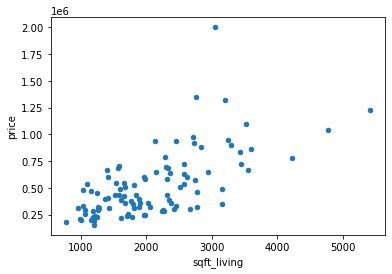

In [4]:
data.plot(kind='scatter', x='sqft_living', y='price')
plt.show

In [6]:
#drop null values
data = data.dropna()
data.head(25)

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680
5,1225000.0,4,4.50,5420
6,257500.0,3,2.25,1715
7,291850.0,3,1.50,1060
8,229500.0,3,1.00,1780
9,323000.0,3,2.50,1890


In [8]:
#insert X and Y
X = data[['bedrooms', 'bathrooms','sqft_living']]
Y = data['price']
X


,bedrooms,bathrooms,sqft_living
0,3,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680
5,4,4.50,5420
6,3,2.25,1715
7,3,1.50,1060
8,3,1.00,1780
9,3,2.50,1890


In [52]:
# Import Segregating data from scikit learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=100)
X_train
#y_train

,bedrooms,bathrooms,sqft_living
32,4,1.75,2330
6,3,2.25,1715
3,4,3.00,1960
12,3,1.00,1430
51,5,2.50,3150
...,...,...,...
79,4,2.50,3450
87,3,3.25,2770
67,4,2.50,2240
24,3,2.25,2450


In [63]:
X_train = np.array(X_train)
X_test = np.array(X_train)
X_test

array([[4.000e+00, 1.750e+00, 2.330e+03],
       [3.000e+00, 2.250e+00, 1.715e+03],
       [4.000e+00, 3.000e+00, 1.960e+03],
       [3.000e+00, 1.000e+00, 1.430e+03],
       [5.000e+00, 2.500e+00, 3.150e+03],
       [3.000e+00, 1.000e+00, 9.600e+02],
       [4.000e+00, 2.500e+00, 2.380e+03],
       [3.000e+00, 2.250e+00, 1.660e+03],
       [5.000e+00, 2.250e+00, 2.730e+03],
       [3.000e+00, 1.000e+00, 1.000e+03],
       [4.000e+00, 4.000e+00, 3.430e+03],
       [3.000e+00, 1.750e+00, 1.790e+03],
       [3.000e+00, 2.500e+00, 2.420e+03],
       [5.000e+00, 2.750e+00, 3.595e+03],
       [4.000e+00, 1.750e+00, 1.760e+03],
       [3.000e+00, 2.500e+00, 2.320e+03],
       [4.000e+00, 1.000e+00, 1.600e+03],
       [3.000e+00, 1.500e+00, 1.580e+03],
       [3.000e+00, 1.750e+00, 1.540e+03],
       [3.000e+00, 1.000e+00, 1.180e+03],
       [2.000e+00, 1.000e+00, 1.200e+03],
       [3.000e+00, 1.000e+00, 1.280e+03],
       [4.000e+00, 1.000e+00, 1.220e+03],
       [3.000e+00, 2.500e+00, 3.16

In [54]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
print("Coefficients: ",model.coef_)
print("Intercept: ",model.intercept_)

Coefficients:  [ 44977.06946532 -30535.85542947    212.61403121]
Intercept:  -38039.05645992857


In [67]:
-38039.05645992857 + 44977.06946532*3 + ((-30535.85542947)*2.25) + 212.61403121*1715

392819.5407448739

In [60]:
# Predicting the house price for the Test values
y_pred = model.predict(X_test)
model.predict([[3, 2.25, 1715]])

array([392819.54075216])

In [62]:
y_pred = model.predict(X)
data['Prediction'] = y_pred
data

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,price,bedrooms,bathrooms,sqft_living,Prediction
0,221900.0,3,1.00,1180,317240.853339
1,538000.0,3,2.25,2570,574604.537440
2,180000.0,2,1.00,770,185092.031076
3,604000.0,4,3.00,1960,466985.156293
4,510000.0,3,2.00,1680,393012.013517
...,...,...,...,...,...
95,905000.0,4,2.50,3300,767155.885835
96,247500.0,3,1.75,1960,460177.906114
97,199000.0,4,1.50,1160,342697.714466
98,314000.0,3,1.75,1810,428285.801432
